In [1]:
#Scikit-learn exer 0
# a)
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset("mpg")
clean_data = dataset.dropna()
clean_data = clean_data.drop("name",axis= 'columns',)
clean_data = clean_data.drop("origin",axis= 'columns',)
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


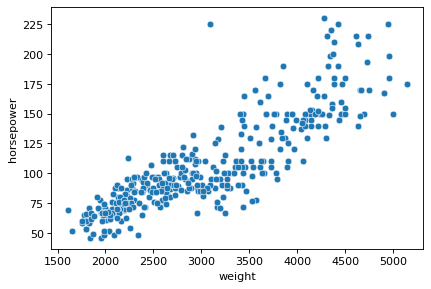

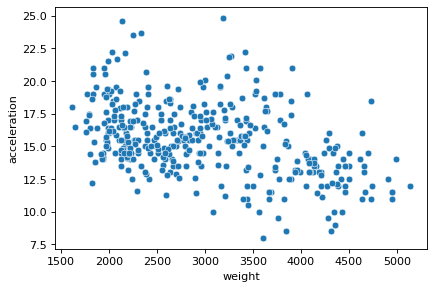

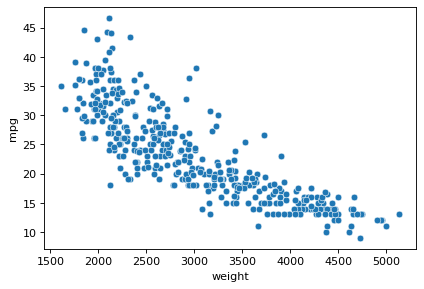

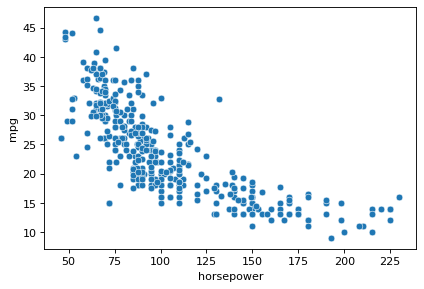

In [2]:
plot_list = [["weight", "horsepower"],[ "weight", "acceleration"],["weight","mpg"],["horsepower", "mpg"]]
for i in range(len(plot_list)):
    fig, ax = plt.subplots(dpi=80)
    sns.scatterplot(x = clean_data[plot_list[i][0]], y = clean_data[plot_list[i][1]])


In [3]:
#1. Train / Test Split
from sklearn.model_selection import train_test_split
X_data = clean_data.drop("mpg",axis= 'columns')
#X_data = clean_data["horsepower"]
y_data = clean_data["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((313, 6), (79, 6), (313,), (79,))

In [4]:
#2. Function for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def metricFunction(scaled_X_test, y_test, model):
    y_pred = model.predict(scaled_X_test)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    return(f"MAE {MAE:.2f}, MSE {MSE:.2f}, RMSE {RMSE:.2f}")



In [5]:
#2. Linear Regression (SVD)

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()
print(type(scaler))

scaler.fit(X_train)
scaler.data_max_


scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
print(f"Min value in X_train: {scaled_X_train.min()}")
print(f"Max value in X_train: {scaled_X_train.min()}")

print(f"Min value in X_test: {scaled_X_test.min()}")
print(f"Max value in X_test: {scaled_X_test.max()}")

model_SVD = LinearRegression()
model_SVD.fit(scaled_X_train, y_train)

print(f"Weights (Beta_hats) {model_SVD.coef_}")
print(f"Intercept {model_SVD.intercept_}")


<class 'sklearn.preprocessing._data.MinMaxScaler'>
Min value in X_train: 0.0
Max value in X_train: 0.0
Min value in X_test: -0.0051948051948051965
Max value in X_test: 1.0
Weights (Beta_hats) [ -0.580865     0.39018741  -0.41884721 -23.14066817   1.03715653
   9.12763733]
Intercept 27.715486259157814


In [6]:
# Manual test

test_sample_features = scaled_X_test[0].reshape(1,-1)
test_sample_target = y_test.values[0]

#uses the weights and intercept from the fitting
model_SVD.predict(test_sample_features)[0], test_sample_target

(25.93279618278241, 26.0)

In [7]:
metricFunction(scaled_X_test, y_test, model_SVD)

'MAE 2.50, MSE 10.50, RMSE 3.24'

In [8]:
#3. Compare Models


In [9]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter=100000)
model_SGD.fit(scaled_X_train, y_train)

print(f"Weights (Beta_hats) {model_SGD.coef_}")
print(f"Intercept {model_SGD.intercept_}")

Weights (Beta_hats) [ -1.98439216  -4.99975011   0.05622436 -14.77793888   1.62859674
   8.99703571]
Intercept [26.53747558]


In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

for i in range(3):
    polynomial = PolynomialFeatures(degree = (i+1), include_bias = False)
    X_polynomial = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.fit_transform(X_test)
    X_polynomial.shape


    model = LinearRegression()
    model.fit(X_polynomial,y_train)
    model.coef_

    y_pred = model.predict(X_test_poly)
    print(f"Polymodel degree {i+1}: {metricFunction(X_test_poly,y_test, model)}")

Polymodel degree 1: MAE 2.50, MSE 10.50, RMSE 3.24
Polymodel degree 2: MAE 1.98, MSE 7.42, RMSE 2.72
Polymodel degree 3: MAE 2.12, MSE 9.27, RMSE 3.05


In [10]:
modellist = [model_SVD,model_SGD]
modelnames = ["Model SVD", "Model SGD"]
for i in range(len(modellist)):
    print(f"{modelnames[i]} values: {metricFunction(scaled_X_test, y_test, modellist[i])}")

Model SVD values: MAE 2.50, MSE 10.50, RMSE 3.24
Model SGD values: MAE 2.56, MSE 11.16, RMSE 3.34
